In [1]:
# Importing Library's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing warnings to ignore
import warnings
warnings.filterwarnings('ignore')

# Loading and Understanding Data 

In [2]:
# Loading Leads data using pandas
data = pd.read_csv("Leads.csv")

In [3]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Checking Null Values Count

In [6]:
data.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Shape of Data set
data.shape

(9240, 37)

In [8]:
# Checking Duplocate rows
copy_data = data.copy()

copy_data.drop_duplicates(subset=None, inplace=True)
copy_data.shape

(9240, 37)

- There are no Duplicate Values in the data set.

# Data Pre-processing

## Cheking Columns with Select value and replacing it with null 

In [9]:
Cols_with_select = []
for col in data.columns:
    if len(data[col].isin(['Select']).unique())>1:
        Cols_with_select.append(col)
print(Cols_with_select)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [10]:
data[['Specialization']].value_counts()

Specialization                   
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
dtype: int64

In [11]:
data[['How did you hear about X Education']].value_counts()

How did you hear about X Education
Select                                5043
Online Search                          808
Word Of Mouth                          348
Student of SomeSchool                  310
Other                                  186
Multiple Sources                       152
Advertisements                          70
Social Media                            67
Email                                   26
SMS                                     23
dtype: int64

In [12]:
data[['Lead Profile']].value_counts()

Lead Profile               
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
dtype: int64

In [13]:
data[['City']].value_counts()

City                       
Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
dtype: int64

In [14]:
data[['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']] = data[['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']].replace('Select', np.nan)


In [15]:
# Again Checking for columns
Cols_with_select = []
for col in data.columns:
    if len(data[col].isin(['Select']).unique())>1:
        Cols_with_select.append(col)
print(Cols_with_select)

[]


- Successfully Select has been replaced with null Vaue in all the columns

# Handling Null Values

In [16]:
round(((data.isnull().sum()/data.shape[0])*100),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [17]:
# Dropping Columns with null Values 
null_cols = data.isnull().sum()/data.shape[0]
null_cols = null_cols[null_cols.values > 0.45]
null_cols

How did you hear about X Education    0.784632
Lead Quality                          0.515909
Lead Profile                          0.741883
Asymmetrique Activity Index           0.456494
Asymmetrique Profile Index            0.456494
Asymmetrique Activity Score           0.456494
Asymmetrique Profile Score            0.456494
dtype: float64

In [18]:
# Dropping columns with null values grater than 45%
data= data.drop(null_cols.keys(), axis=1)
round(((data.isnull().sum()/data.shape[0])*100),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Ad

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Imputing Null Values

In [20]:
numerical_columns = data.select_dtypes(include =["number"]).columns.values

print("NUMERICAL COLUMNS : \n {} ".format(numerical_columns))

NUMERICAL COLUMNS : 
 ['Lead Number' 'Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


In [21]:
data.TotalVisits.value_counts().head(5)
mode_value = data['TotalVisits'].mode()[0]
data['TotalVisits'].fillna(mode_value, inplace=True)
data['TotalVisits'].isnull().sum()

0

In [22]:
data['Page Views Per Visit'].value_counts().head(5)
mode_value = data['Page Views Per Visit'].mode()[0]
data['Page Views Per Visit'].fillna(mode_value, inplace=True)
data['Page Views Per Visit'].isnull().sum()

0

In [23]:
for col in data.select_dtypes(exclude =["number"]).columns:
    print("######### "+col+" ########")
    print(data[col].value_counts().head(5))
    print()

######### Prospect ID ########
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
Name: Prospect ID, dtype: int64

######### Lead Origin ########
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

######### Lead Source ########
Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

######### Do Not Email ########
No     8506
Yes     734
Name: Do Not Email, dtype: int64

######### Do Not Call ########
No     9238
Yes       2
Name: Do Not Call, dtype: int64

######### Last Activity ########
Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on 

- City has nearly 40% of missing values. imouting with most frequent value may skew the data and model that we build. So dropping City column.
- Tags, Country, What matters most to you in choosing a course are few features that may dont have any impact on the model

In [24]:
# Dropping Columns
print("Before Droping the cols",data.shape)
data.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Droping the cols",data.shape)

Before Droping the cols (9240, 30)
After Droping the cols (9240, 26)


In [25]:
# Imputing missing values with reasonable data
missing ={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}

data = data.fillna(value=missing)

In [26]:
# Checking null Values count
round(((data.isnull().sum()/data.shape[0])*100),2).sort_values(ascending=False)

Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

- From Above Data we can observe there are no missing values

In [27]:
# Checking for Columns that can be dropped
print("Before Dropping: ",data.shape)
data.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping: ",data.shape)

Before Dropping:  (9240, 26)
After Dropping:  (9240, 23)


In [28]:
col_drop = ["I agree to pay the amount through cheque","Get updates on DM Content","Update me on Supply Chain Content","Receive More Updates About Our Courses","Magazine"]
data.drop(col_drop, 1, inplace = True)

In [29]:
data.shape

(9240, 18)

# Data Visualization

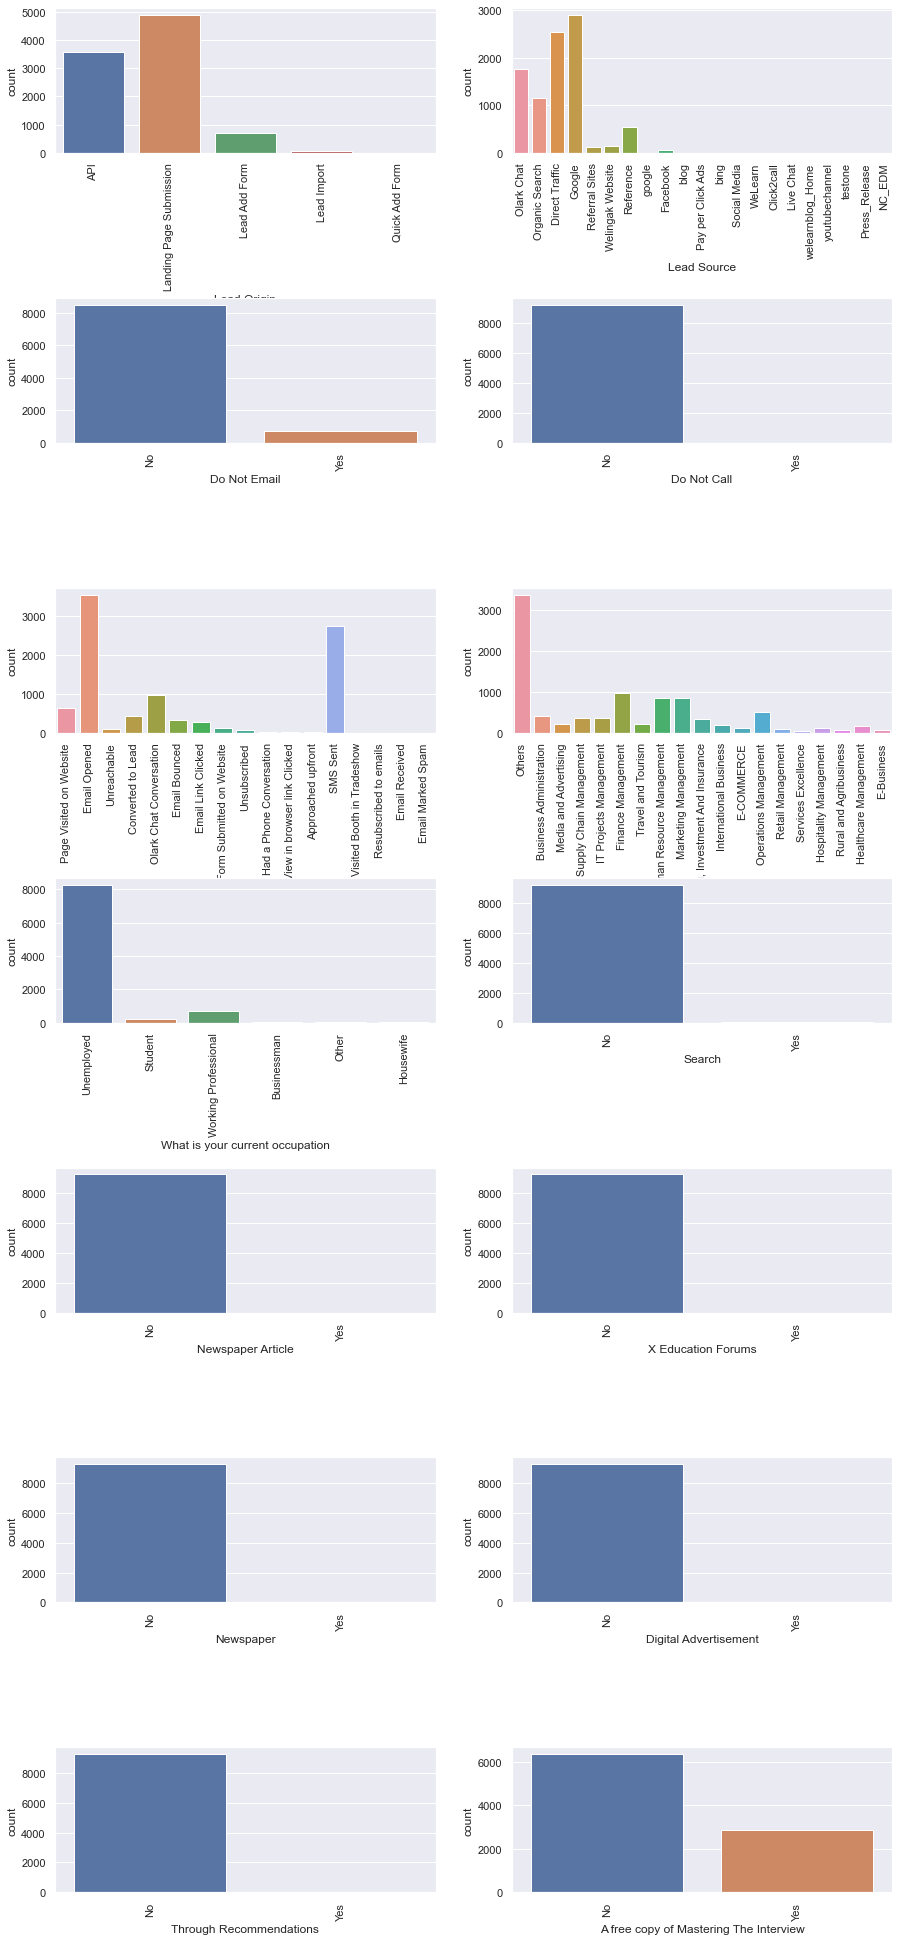

In [30]:
plt.figure(figsize=(15,40))
sns.set()
plt.subplots_adjust(wspace=.2,hspace=1 )
cat_columns = data.select_dtypes(exclude =["number"]).columns.values
for i in enumerate(cat_columns):
    plt.subplot(8,2, i[0]+1)
    sns.countplot(i[1],data=data) 
    plt.xticks(rotation=90)
plt.show()

Insight from data

    - from the above graphs we can see that Search, Do not call, Newspaper, Newspaper Aticle, Digital Advertisement, X Education Forums, Through Recommendations is highly skewed. Hence Dropping this columns will be good for model 

In [31]:
print("Before Drop: ",data.shape)
data.drop(['Search', 'Do Not Call', 'Newspaper', 'Newspaper Article', 'Digital Advertisement','X Education Forums', 'Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",data.shape)

Before Drop:  (9240, 18)
After Drop:  (9240, 11)


In [32]:
round(data['Converted'].value_counts()/data.shape[0]*100,2)

0    61.46
1    38.54
Name: Converted, dtype: float64

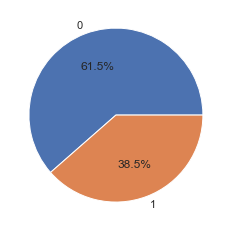

In [33]:
# round(data['Converted'].value_counts()/data.shape[0]*100,2)
plt.pie(data['Converted'].value_counts(),labels=["0","1"], autopct='%1.1f%%')
plt.show()

# Univariate Analysis

In [34]:
# Changing the Column Names
data.rename(columns={'What is your current occupation': 'Occupation', 
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
print(data.columns)
print(data.shape)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation', 'Free Copy'],
      dtype='object')
(9240, 11)


In [35]:
# Categorical Columns
categorical_columns = data.select_dtypes(exclude =["number"]).columns.values
print(categorical_columns)

['Lead Origin' 'Lead Source' 'Do Not Email' 'Last Activity'
 'Specialization' 'Occupation' 'Free Copy']


In [36]:
# Creating a function for univarient Analysis
def feature_univarient_Analysis(feature,label_rotation=False,horizontal_layout=True):
    perc = data[[feature, 'Converted']].groupby([feature],as_index=False).mean()
    perc["Converted"] = perc["Converted"]*100
    perc.sort_values(by='Converted', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))   
    sns.set_palette("Set2")
    graph = sns.countplot(ax=ax1,x = feature, data=data,hue ="Converted",order=perc[feature],palette=['r','g'])

    ax1.set_title(feature, fontdict={'fontsize' : 15, 'color' : 'Blue'}) 
    ax1.legend(['Not Converted','Converted'])
    
    if(label_rotation):
        graph.set_xticklabels(graph.get_xticklabels(),rotation=90)

    graph = sns.barplot(ax=ax2, x = feature, y='Converted', order=perc[feature], data=perc,palette='Set2')
    
    if(label_rotation):
        graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Converted leads [%]', fontsize=15)
    plt.xlabel(feature,fontsize=15)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + "( Converted % )", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.show()

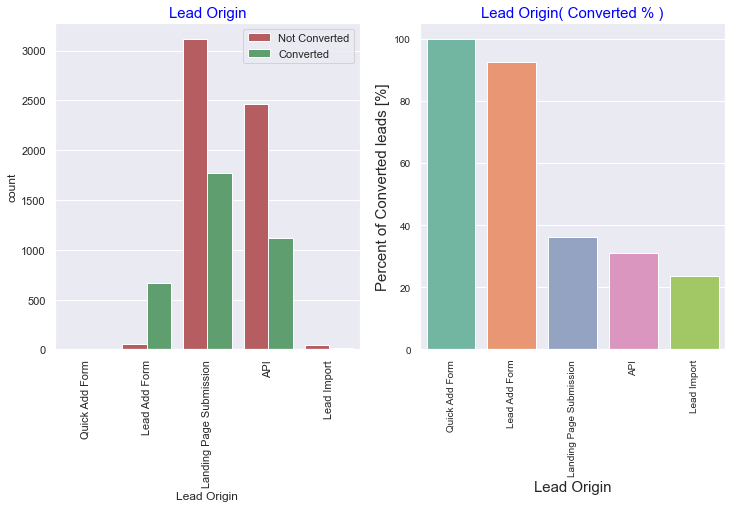

In [37]:
# UNivarient Analysis of Lead Origin
feature_univarient_Analysis("Lead Origin",label_rotation=True)

To improve lead conversion rate:

    - improving lead converion of "API" and "Landing Page Submission origin"
    - Generating more leads from "Lead Add Form" and "Quick Add Form"

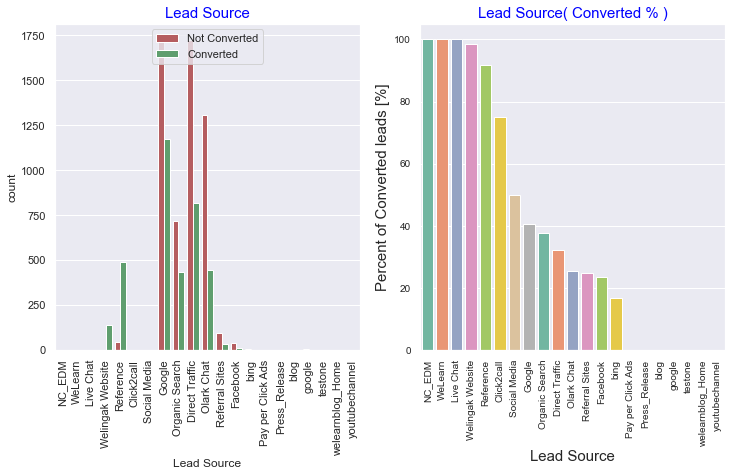

In [38]:
feature_univarient_Analysis("Lead Source",label_rotation=True)


To increase lead count:
    
    - we should encourage and incentivize existing members to get more referrals. since, it has 90% conversion rate

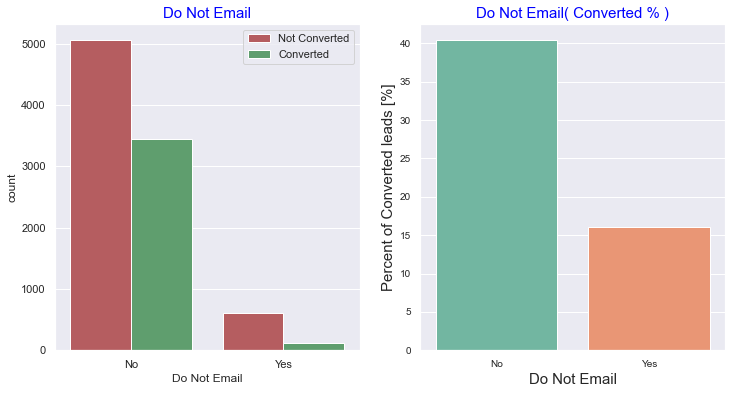

In [39]:
feature_univarient_Analysis("Do Not Email")

- Majority of people are fine with receiving emails

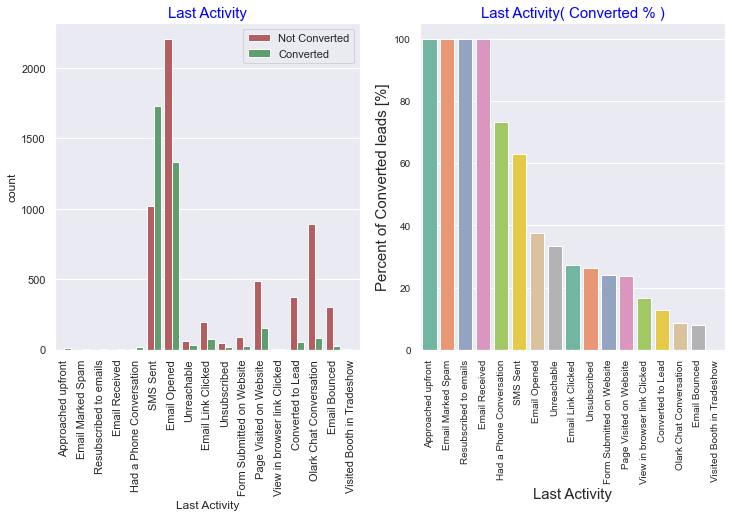

In [40]:
feature_univarient_Analysis("Last Activity",label_rotation=True)

- Emails opened and SMS sent have more converstion rate than others

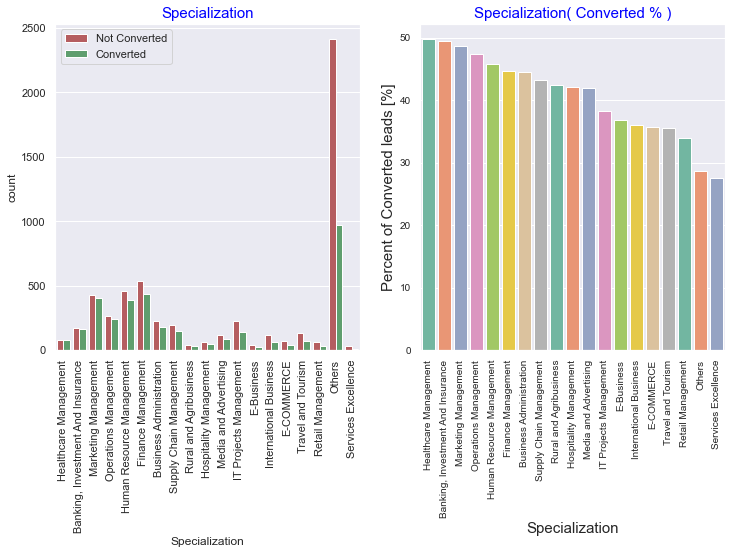

In [41]:
feature_univarient_Analysis("Specialization",label_rotation=True)

- Most of the Leads are in others specialization

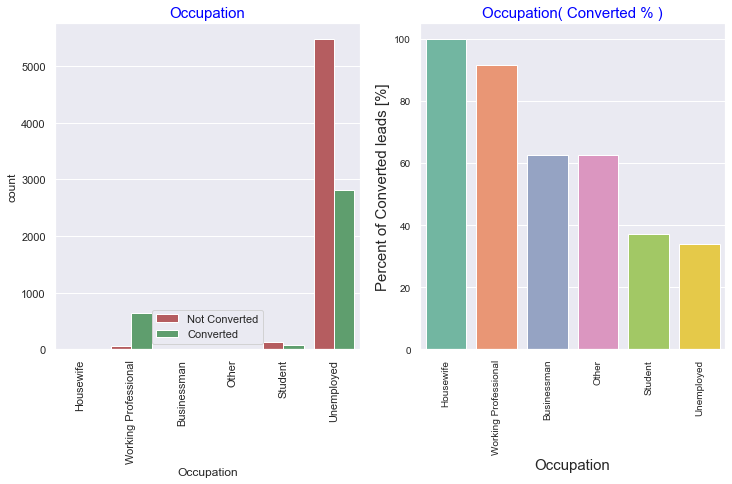

In [42]:
feature_univarient_Analysis("Occupation",label_rotation=True)

- UnEmployment has highest conversion rate 
- Housewifes are with 100% conversion rate

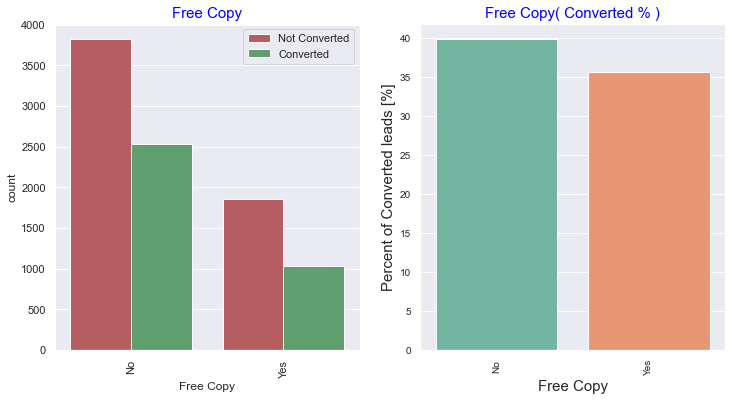

In [43]:
feature_univarient_Analysis("Free Copy",label_rotation=True)

- There is no major difference between the leads who got Mastering Interview for free. We can remove this column since it dont have any significant impact on the model

In [44]:
# Numerical Columns
num_columns = data.select_dtypes(include =["number"]).columns.values
num_columns

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

<Figure size 1440x1080 with 0 Axes>

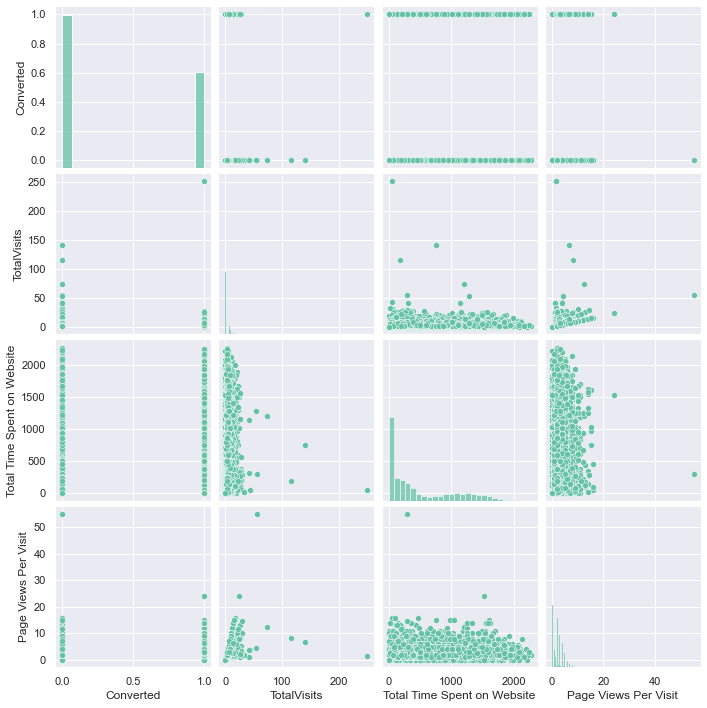

In [45]:
# Pair plot of numerical columns
plt.figure(figsize=(20, 15))
sns.pairplot(data[num_columns])
plt.show()

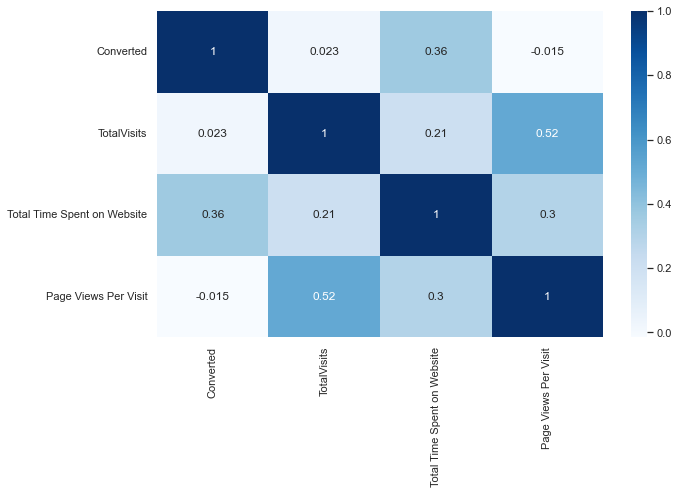

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.show()

- Total Views and Page Views have some co-relation between them

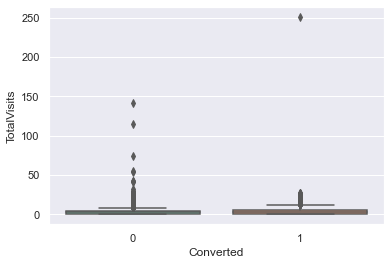

In [47]:
# Checking Outliers in Numerical columns
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)
plt.show()

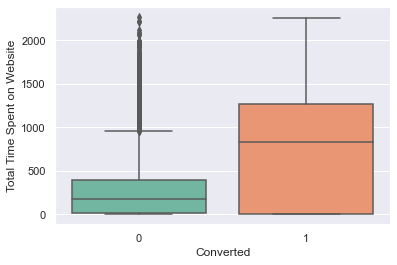

In [48]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)
plt.show()

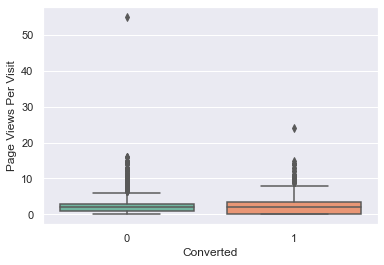

In [49]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)
plt.show()

- People whose spend more time on webiste has higher chance of getting converted.
- There are some outliers we need to treat them 

# Bivariate Analysis

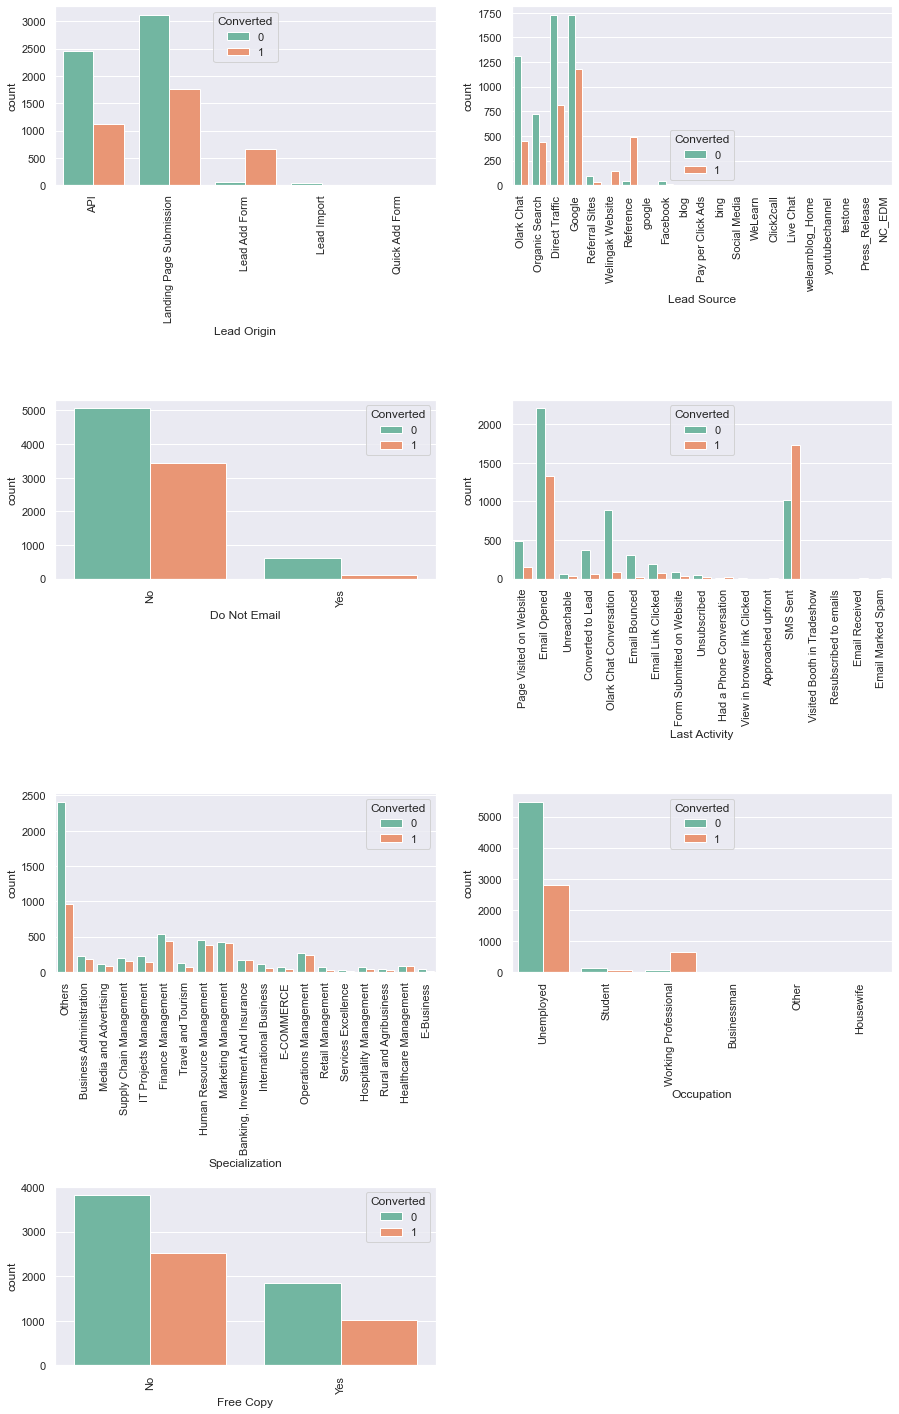

In [50]:
# Bivarient Analysis of Categorical Features
plt.figure(figsize=(15,25))
plt.subplots_adjust(wspace=.2,hspace=1.2 )
for i in enumerate(categorical_columns):
    plt.subplot(4,2, i[0]+1)
    sns.countplot(x = i[1],hue = 'Converted', data = data)
    plt.xticks(rotation=90)
plt.show()

<Figure size 1440x1440 with 0 Axes>

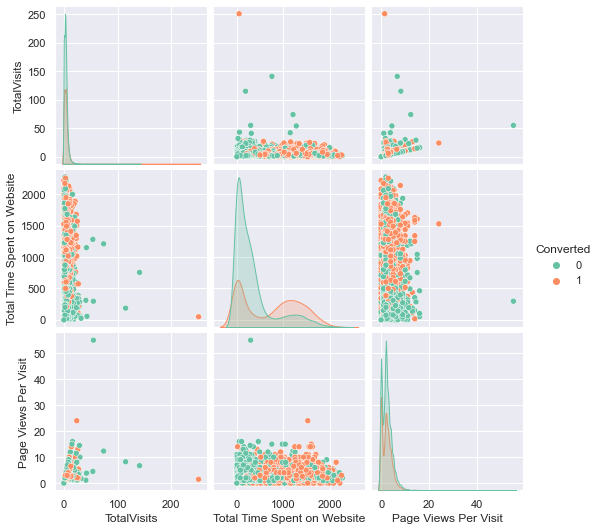

In [51]:
plt.figure(figsize =(20,20))
sns.pairplot(data[num_columns],hue="Converted",kind='scatter')                                  
plt.show()

# Data Standardization

In [52]:
# Dropping Free Copy Column
data.drop('Free Copy',axis = 1, inplace = True)
data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

## Outlier Treatment

In [53]:
data.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [54]:
print(data.shape)

(9240, 10)


In [55]:
#Capping data at 95%
data.loc[data['TotalVisits'] >= data['TotalVisits'].quantile(0.95), 'TotalVisits'] = data['TotalVisits'].quantile(0.95) # outlier capping
data.loc[data['Page Views Per Visit'] >= data['Page Views Per Visit'].quantile(0.95), 'Page Views Per Visit'] = data['Page Views Per Visit'].quantile(0.95) # outlier capping


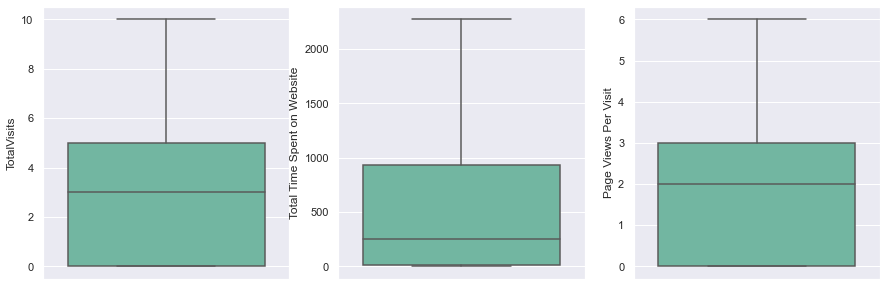

In [56]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', data = data)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = data)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = data)
plt.show()

In [57]:
data.describe(percentiles=[.10,.25,.50,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.134740,487.698268,2.225451
std,0.486714,2.787787,548.021466,1.800023
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


# Checking Binary variables

In [58]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [59]:
data['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [60]:
# Converting Do Not Email to numerical values
data['Do Not Email'] = data['Do Not Email'].replace(['Yes'], 1)
data['Do Not Email'] = data['Do Not Email'].replace(['No'], 0)

In [61]:
data['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

In [62]:
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

In [63]:
data['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Other Sources         23
google                 5
Name: Lead Source, dtype: int64

In [64]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [65]:
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')

In [66]:
data['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Other Activity                 51
Name: Last Activity, dtype: int64

# Data-type of columns

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Occupation                   9240 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 722.0+ KB


# Creating Dummy Variables 

In [68]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed


In [69]:
dummy_columns = pd.get_dummies(data[['Lead Origin', 'Lead Source','Last Activity', 'Specialization','Occupation']], drop_first=True)
data = pd.concat([data, dummy_columns],axis=1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,...,0,0,0,0,0,0,0,0,1,0


In [70]:
data = data.drop(['Lead Origin', 'Lead Source','Last Activity', 'Specialization','Occupation'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

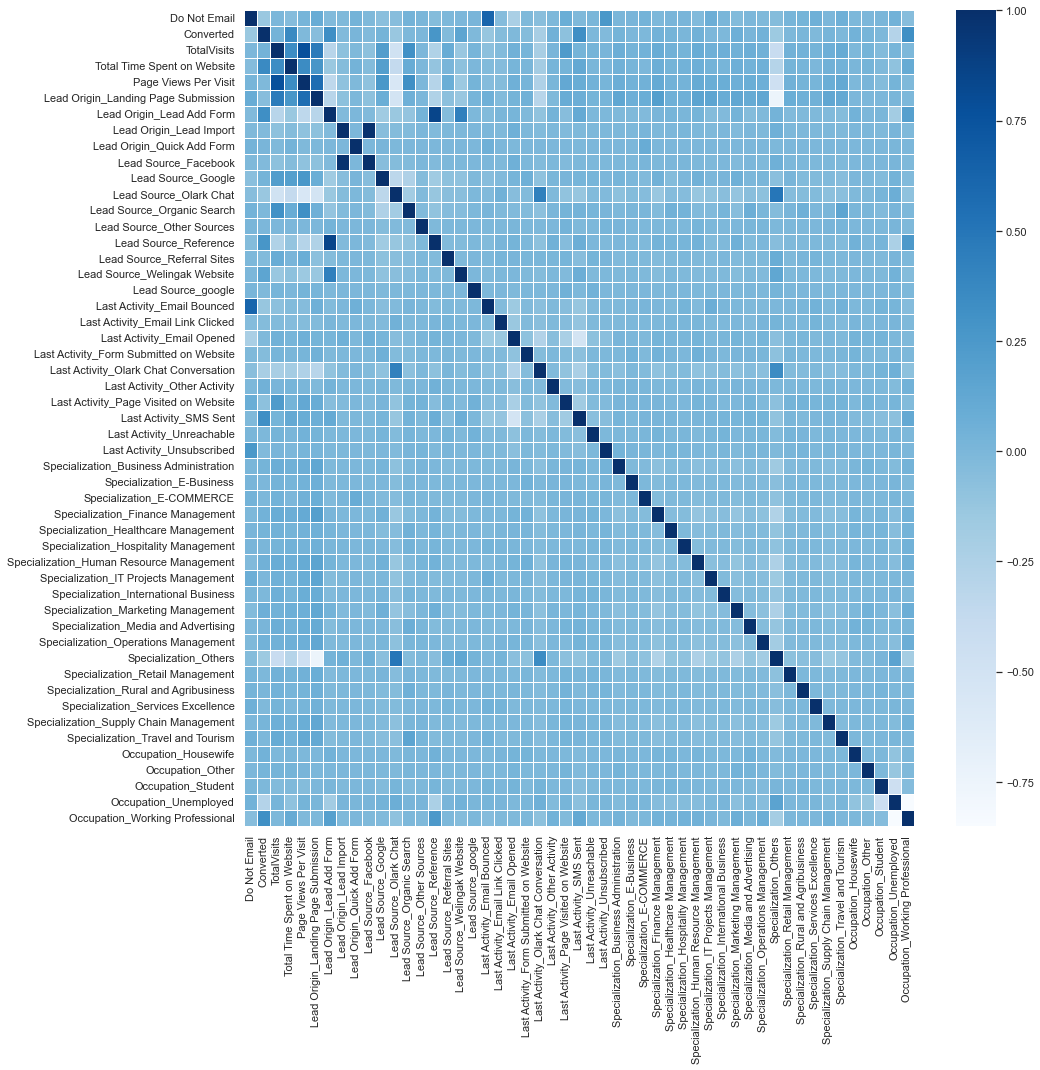

In [71]:
plt.figure(figsize=[15,15])
sns.heatmap(data.corr(), cmap="Blues",linewidth =1)
plt.show()

In [72]:
data.shape

(9240, 51)

# Data Preparation

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [74]:
y=data['Converted']
X=data.drop(['Converted'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,test_size=0.30,random_state=100)

In [75]:
print(" Shape of X_train : ",X_train.shape)
print(" Shape of y_train : ",y_train.shape)
print(" Shape of X_test : ",X_test.shape)
print(" Shape of y_test : ",y_test.shape)


 Shape of X_train :  (6468, 50)
 Shape of y_train :  (6468,)
 Shape of X_test :  (2772, 50)
 Shape of y_test :  (2772,)


# Scaling

In [76]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,3.126933,483.875850,2.214918,0.528139,0.079468,0.005102,0.000155,0.005102,0.320037,...,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613
std,0.268799,2.787256,546.565663,1.794032,0.499246,0.270489,0.071252,0.012434,0.071252,0.466527,...,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.035150,0.143484,0.302929,0.267582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,246.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,5.000000,926.500000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,10.000000,2272.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
scaler= StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,6.663398e-17,-1.609377e-16,2.382482e-17,0.528139,0.079468,0.005102,0.000155,0.005102,0.320037,...,0.010823,0.007267,0.004793,0.037570,0.021336,0.001391,0.001237,0.021027,0.897805,0.077613
std,0.268799,1.000077e+00,1.000077e+00,1.000077e+00,0.499246,0.270489,0.071252,0.012434,0.071252,0.466527,...,0.103475,0.084940,0.069069,0.190168,0.144512,0.037279,0.035150,0.143484,0.302929,0.267582
min,0.000000,-1.121955e+00,-8.853708e-01,-1.234699e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.121955e+00,-8.634138e-01,-1.234699e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,-4.554387e-02,-4.352528e-01,-1.198054e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,6.720633e-01,8.098906e-01,4.376415e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2.466081e+00,3.271816e+00,2.109982e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Logistic Regresion Model

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [79]:
# Doing RFE Analysis 
model = LogisticRegression()
rfe = RFE(model,n_features_to_select=15)           
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 12),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Origin_Quick Add Form', False, 17),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 27),
 ('Lead Source_Other Sources', False, 14),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 10),
 ('Last Activity_Email Bounced', False, 34),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on

In [80]:
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Hospitality Management',
       'Specialization_Others', 'Occupation_Housewife',
       'Occupation_Working Professional'],
      dtype='object')

In [81]:
X_train_rfe=X_train[selected_columns]
X_train_rfe.shape

(6468, 15)

# Feature Elimination

In [82]:
def VIF_calculator(df):
    vi_factor = pd.DataFrame()
    vi_factor['Features'] = df.columns
    vi_factor['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vi_factor['VIF'] = round(vi_factor['VIF'], 2)
    vi_factor = vi_factor.sort_values(by = "VIF", ascending = False)
    return vi_factor

In [83]:
VIF_calculator(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,2.03
12,Specialization_Others,1.99
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.48
6,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.45
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
14,Occupation_Working Professional,1.19
0,Do Not Email,1.17


## Model 1

In [84]:
model_1 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2710.8
Date:                Mon, 22 May 2023   Deviance:                       5421.6
Time:                        22:21:34   Pearson chi2:                 9.18e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3881
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4130      0.122     -3.391      0.001      -0.652      -0.174
Do Not Email                             -1.4751      0.173     -8.543      0.000      -1.814      -1.137
Total Time Spent on Website               1.0644      0.039     27.346      0.000       0.988       1.141
Lead Origin_Landing Page Submission      -1.1211      0.126     -8.909      0.000      -1.368      -0.874
Lead Origin_Lead Add Form                 3.0942      0.203     15.267      0.000       2.697       3.491
Lead Source_Olark Chat                    1.0695      0.120      8.888      0.000       0.834       1.305
Lead Source_Welingak Website              2.5453      0.747      3.407      0.001       1.081       4.010
Last Activity_Olark Chat Conversation    -1.2726      0.169     -7.536      0.000      -1.604      -0.942
Last Activity_Other Activity              1.7824      0.471      3.782      0.000       0.859       2.706
Last Activity_SMS Sent                    1.3735      0.073     18.700      0.000       1.230       1.518
Last Activity_Unreachable                 0.3763      0.352      1.068      0.286      -0.314       1.067
Last Activity_Unsubscribed                1.0385      0.481      2.161      0.031       0.097       1.980
Specialization_Hospitality Management    -1.0446      0.320     -3.264      0.001      -1.672      -0.417
Specialization_Others                    -1.1818      0.121     -9.770      0.000      -1.419      -0.945
Occupation_Housewife                     23.0085   1.33e+04      0.002      0.999   -2.61e+04    2.61e+04
Occupation_Working Professional           2.6196      0.189     13.824      0.000       2.248       2.991
=========================================================================================================
"""

### Insight:

- from above data we can observe that Occupation_Housewife has high P value of 0.999. so we should remove it

In [85]:
print(X_train_rfe.shape)

(6468, 15)


In [86]:
X_train_rfe = X_train_rfe.drop(['Occupation_Housewife'],axis=1)
print(X_train_rfe.shape)

(6468, 14)


In [87]:
VIF_calculator(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,2.03
12,Specialization_Others,1.99
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.47
6,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.45
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
13,Occupation_Working Professional,1.19
0,Do Not Email,1.17


# Model 2

In [88]:
model_2 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.1
Date:                Mon, 22 May 2023   Deviance:                       5436.2
Time:                        22:21:34   Pearson chi2:                 9.21e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4065      0.122     -3.340      0.001      -0.645      -0.168
Do Not Email                             -1.4805      0.173     -8.577      0.000      -1.819      -1.142
Total Time Spent on Website               1.0634      0.039     27.355      0.000       0.987       1.140
Lead Origin_Landing Page Submission      -1.1160      0.126     -8.876      0.000      -1.362      -0.870
Lead Origin_Lead Add Form                 3.1087      0.202     15.358      0.000       2.712       3.505
Lead Source_Olark Chat                    1.0687      0.120      8.886      0.000       0.833       1.304
Lead Source_Welingak Website              2.5316      0.747      3.388      0.001       1.067       3.996
Last Activity_Olark Chat Conversation    -1.2762      0.169     -7.559      0.000      -1.607      -0.945
Last Activity_Other Activity              1.7747      0.471      3.766      0.000       0.851       2.698
Last Activity_SMS Sent                    1.3652      0.073     18.610      0.000       1.221       1.509
Last Activity_Unreachable                 0.3671      0.352      1.042      0.297      -0.323       1.058
Last Activity_Unsubscribed                1.0352      0.480      2.154      0.031       0.093       1.977
Specialization_Hospitality Management    -1.0512      0.320     -3.286      0.001      -1.678      -0.424
Specialization_Others                    -1.1855      0.121     -9.807      0.000      -1.422      -0.949
Occupation_Working Professional           2.6120      0.189     13.789      0.000       2.241       2.983
=========================================================================================================
"""

In [89]:
X_train_rfe = X_train_rfe.drop(['Last Activity_Unreachable'],axis=1)
print(X_train_rfe.shape)

(6468, 13)


In [90]:
VIF_calculator(X_train_rfe)

,Features,VIF
4,Lead Source_Olark Chat,2.03
11,Specialization_Others,1.99
8,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.47
6,Last Activity_Olark Chat Conversation,1.46
2,Lead Origin_Landing Page Submission,1.44
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.24
12,Occupation_Working Professional,1.19
0,Do Not Email,1.17


# Model 3

In [91]:
model_3 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2718.6
Date:                Mon, 22 May 2023   Deviance:                       5437.2
Time:                        22:21:35   Pearson chi2:                 9.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3866
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3994      0.122     -3.286      0.001      -0.638      -0.161
Do Not Email                             -1.4798      0.173     -8.573      0.000      -1.818      -1.142
Total Time Spent on Website               1.0623      0.039     27.348      0.000       0.986       1.138
Lead Origin_Landing Page Submission      -1.1161      0.126     -8.872      0.000      -1.363      -0.870
Lead Origin_Lead Add Form                 3.1064      0.202     15.351      0.000       2.710       3.503
Lead Source_Olark Chat                    1.0655      0.120      8.864      0.000       0.830       1.301
Lead Source_Welingak Website              2.5295      0.747      3.386      0.001       1.065       3.994
Last Activity_Olark Chat Conversation    -1.2802      0.169     -7.585      0.000      -1.611      -0.949
Last Activity_Other Activity              1.7688      0.471      3.755      0.000       0.846       2.692
Last Activity_SMS Sent                    1.3594      0.073     18.596      0.000       1.216       1.503
Last Activity_Unsubscribed                1.0291      0.480      2.142      0.032       0.088       1.971
Specialization_Hospitality Management    -1.0501      0.320     -3.279      0.001      -1.678      -0.423
Specialization_Others                    -1.1871      0.121     -9.817      0.000      -1.424      -0.950
Occupation_Working Professional           2.6104      0.189     13.781      0.000       2.239       2.982
=========================================================================================================
"""

## This Model Looks good with P value below 0.05. so this model can be considered as good model for prediction

In [99]:
# Dropping some columns which may not be useful
X_train_rfe = X_train_rfe.drop(['Specialization_Hospitality Management'],axis=1)

In [116]:
y_train.shape

(6468,)

In [117]:
X_train_rfe.shape

(6468, 10)

In [100]:
model_4 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2724.2
Date:                Mon, 22 May 2023   Deviance:                       5448.4
Time:                        23:45:36   Pearson chi2:                 9.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3855
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.4194      0.121     -3.459      0.001      -0.657      -0.182
Do Not Email                             -1.4851      0.172     -8.615      0.000      -1.823      -1.147
Total Time Spent on Website               1.0568      0.039     27.295      0.000       0.981       1.133
Lead Origin_Landing Page Submission      -1.1100      0.126     -8.839      0.000      -1.356      -0.864
Lead Origin_Lead Add Form                 3.0794      0.202     15.273      0.000       2.684       3.475
Lead Source_Olark Chat                    1.0625      0.120      8.851      0.000       0.827       1.298
Lead Source_Welingak Website              2.5520      0.747      3.417      0.001       1.088       4.016
Last Activity_Olark Chat Conversation    -1.2828      0.169     -7.612      0.000      -1.613      -0.953
Last Activity_Other Activity              1.7790      0.470      3.782      0.000       0.857       2.701
Last Activity_SMS Sent                    1.3560      0.073     18.581      0.000       1.213       1.499
Last Activity_Unsubscribed                1.0111      0.486      2.079      0.038       0.058       1.964
Specialization_Others                    -1.1639      0.121     -9.656      0.000      -1.400      -0.928
Occupation_Working Professional           2.6049      0.189     13.755      0.000       2.234       2.976
=========================================================================================================
"""

In [101]:
data.shape

(9240, 51)

In [102]:
X_train_rfe = X_train_rfe.drop(['Specialization_Others'],axis=1)

In [103]:
model_5 = sm.GLM(y_train,sm.add_constant(X_train_rfe), family = sm.families.Binomial()).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2772.4
Date:                Mon, 22 May 2023   Deviance:                       5544.9
Time:                        23:45:54   Pearson chi2:                 8.43e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3763
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3080      0.079    -16.496      0.000      -1.463      -1.153
Do Not Email                             -1.5133      0.172     -8.821      0.000      -1.850      -1.177
Total Time Spent on Website               1.0843      0.038     28.172      0.000       1.009       1.160
Lead Origin_Landing Page Submission      -0.2469      0.086     -2.860      0.004      -0.416      -0.078
Lead Origin_Lead Add Form                 3.4818      0.197     17.702      0.000       3.096       3.867
Lead Source_Olark Chat                    1.0205      0.116      8.781      0.000       0.793       1.248
Lead Source_Welingak Website              1.9794      0.744      2.661      0.008       0.522       3.437
Last Activity_Olark Chat Conversation    -1.3568      0.163     -8.305      0.000      -1.677      -1.037
Last Activity_Other Activity              1.7926      0.474      3.783      0.000       0.864       2.721
Last Activity_SMS Sent                    1.3149      0.072     18.180      0.000       1.173       1.457
Last Activity_Unsubscribed                1.0080      0.479      2.106      0.035       0.070       1.946
Occupation_Working Professional           2.7955      0.185     15.127      0.000       2.433       3.158
=========================================================================================================
"""

In [104]:
X_train_rfe = X_train_rfe.drop(['Last Activity_Other Activity'],axis=1)

In [118]:
y_train.shape

(6468,)

In [119]:
X_train_rfe.shape

(6468, 10)

In [130]:
X_train_rfe = sm.add_constant(X_train_rfe)
model_6 = sm.GLM(y_train,X_train_rfe, family = sm.families.Binomial()).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2780.1
Date:                Tue, 23 May 2023   Deviance:                       5560.2
Time:                        00:24:46   Pearson chi2:                 7.34e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3748
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2918      0.079    -16.347      0.000      -1.447      -1.137
Do Not Email                             -1.5086      0.171     -8.825      0.000      -1.844      -1.174
Total Time Spent on Website               1.0848      0.038     28.228      0.000       1.009       1.160
Lead Origin_Landing Page Submission      -0.2470      0.086     -2.866      0.004      -0.416      -0.078
Lead Origin_Lead Add Form                 3.4824      0.196     17.733      0.000       3.097       3.867
Lead Source_Olark Chat                    1.0194      0.116      8.785      0.000       0.792       1.247
Lead Source_Welingak Website              1.9686      0.744      2.647      0.008       0.511       3.426
Last Activity_Olark Chat Conversation    -1.3725      0.163     -8.404      0.000      -1.693      -1.052
Last Activity_SMS Sent                    1.2984      0.072     18.000      0.000       1.157       1.440
Last Activity_Unsubscribed                0.9869      0.479      2.062      0.039       0.049       1.925
Occupation_Working Professional           2.8092      0.185     15.225      0.000       2.448       3.171
=========================================================================================================
"""

- From the above model we can see that there is No sign of multicollinearity. so we can use model_6 as our final model. All p values 0.05

In [131]:
selected_columns = X_train_rfe.columns.values.tolist()
selected_columns

['const',
 'Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Occupation_Working Professional']

In [132]:
selected_columns.remove('const')
selected_columns

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Source_Olark Chat',
 'Lead Source_Welingak Website',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Last Activity_Unsubscribed',
 'Occupation_Working Professional']

# Model Prediction

In [133]:
y_train_pred = model_6.predict(X_train_rfe)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22568551, 0.17760239, 0.26455297, 0.77565252, 0.22568551,
       0.9899449 , 0.08861991, 0.99112943, 0.34647229, 0.89553111])

In [146]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

predicted_final = pd.DataFrame({'Converted_Orig':y_train.values, 'Converted_Prob':y_train_pred})
predicted_final['RecordID'] = y_train.index
predicted_final.head()

,Converted_Orig,Converted_Prob,RecordID
0,0,0.225686,1871
1,0,0.177602,6795
2,0,0.264553,3516
3,0,0.775653,8105
4,0,0.225686,3934


In [148]:
predicted_final['Predicted'] = predicted_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

predicted_final.head()

,Converted_Orig,Converted_Prob,RecordID,Predicted
0,0,0.225686,1871,0
1,0,0.177602,6795,0
2,0,0.264553,3516,0
3,0,0.775653,8105,1
4,0,0.225686,3934,0


# Model Validation

In [149]:
from sklearn import metrics

confusion = metrics.confusion_matrix(predicted_final.Converted_Orig, predicted_final.Predicted )
print(confusion)

[[3513  489]
 [ 758 1708]]


In [150]:
print(metrics.accuracy_score(predicted_final.Converted_Orig, predicted_final.Predicted))

0.807204700061843


#  ROC CURVE

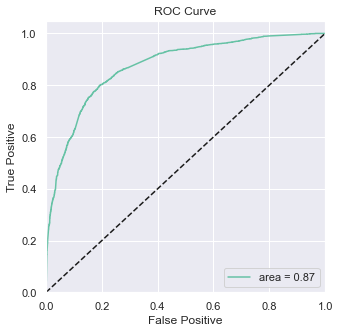

In [153]:
fpr, tpr, thresholds = metrics.roc_curve( predicted_final.Converted_Orig, predicted_final.Converted_Prob,drop_intermediate = False )
roc_auc_score = metrics.roc_auc_score( predicted_final.Converted_Orig, predicted_final.Converted_Prob )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='area = %0.2f' % roc_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [160]:
# Precision
confusion = metrics.confusion_matrix(predicted_final.Converted_Orig, predicted_final.Predicted )
confusion

array([[3513,  489],
       [ 758, 1708]], dtype=int64)

In [164]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    predicted_final[i]= predicted_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
predicted_final.head()

,Converted_Orig,Converted_Prob,RecordID,Predicted,final_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225686,1871,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.177602,6795,0,0,1,1,0,0,0,0,0,0,0,0
2,0,0.264553,3516,0,0,1,1,1,0,0,0,0,0,0,0
3,0,0.775653,8105,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.225686,3934,0,0,1,1,1,0,0,0,0,0,0,0


In [165]:
predicted_final['final_Predicted'] = predicted_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

predicted_final.head()

,Converted_Orig,Converted_Prob,RecordID,Predicted,final_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225686,1871,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.177602,6795,0,0,1,1,0,0,0,0,0,0,0,0
2,0,0.264553,3516,0,0,1,1,1,0,0,0,0,0,0,0
3,0,0.775653,8105,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.225686,3934,0,0,1,1,1,0,0,0,0,0,0,0


In [169]:
predicted_final['Lead_Score'] = predicted_final.Converted_Prob.map( lambda x: round(x*100))

predicted_final[['Converted_Orig','Converted_Prob','RecordID','final_Predicted','Lead_Score']].head()

,Converted_Orig,Converted_Prob,RecordID,final_Predicted,Lead_Score
0,0,0.225686,1871,0,23
1,0,0.177602,6795,0,18
2,0,0.264553,3516,0,26
3,0,0.775653,8105,1,78
4,0,0.225686,3934,0,23


In [171]:
p, r, thresholds = precision_recall_curve(predicted_final['Converted_Orig'], predicted_final['Converted_Prob'])

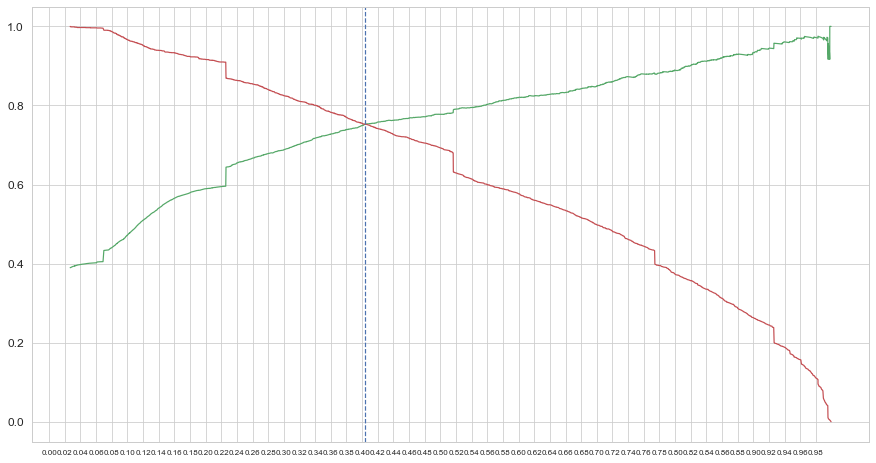

In [172]:
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

In [173]:
predicted_final['final_prediction_2'] = predicted_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
predicted_final.head()

,Converted_Orig,Converted_Prob,RecordID,Predicted,final_Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead_Score,final_prediction_2
0,0,0.225686,1871,0,0,1,1,1,0,0,0,0,0,0,0,23,0
1,0,0.177602,6795,0,0,1,1,0,0,0,0,0,0,0,0,18,0
2,0,0.264553,3516,0,0,1,1,1,0,0,0,0,0,0,0,26,0
3,0,0.775653,8105,1,1,1,1,1,1,1,1,1,1,0,0,78,1
4,0,0.225686,3934,0,0,1,1,1,0,0,0,0,0,0,0,23,0


In [175]:
confusion_matrix = metrics.confusion_matrix(predicted_final.Converted_Orig, predicted_final.final_prediction_2 )

print(confusion_matrix)


[[3393  609]
 [ 610 1856]]


# Predictions using final model

In [177]:
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,...,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.081890,3.152958,496.617244,2.250029,0.530303,0.073593,0.007937,0.0,0.007937,0.300866,...,0.010823,0.00938,0.003247,0.038240,0.023449,0.000361,0.002886,0.026696,0.895743,0.073593
std,0.274247,2.789444,551.399285,1.814013,0.499171,0.261155,0.088749,0.0,0.088749,0.458717,...,0.103485,0.09641,0.056898,0.191809,0.151351,0.018993,0.053654,0.161221,0.305649,0.261155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,3.000000,258.000000,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,5.000000,949.000000,3.500000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,10.000000,2253.000000,6.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
4269,0,1.748474,0.964504,2.109982,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2376,0,-1.121955,-0.885371,-1.234699,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7766,0,0.672063,-0.777416,1.552535,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
9199,0,-1.121955,-0.885371,-1.234699,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4359,0,-1.121955,-0.885371,-1.234699,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [179]:
X_test.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.0,2772.000000,2772.000000,...,2772.000000,2772.00000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,0.081890,0.009338,0.023314,0.019572,0.530303,0.073593,0.007937,0.0,0.007937,0.300866,...,0.010823,0.00938,0.003247,0.038240,0.023449,0.000361,0.002886,0.026696,0.895743,0.073593
std,0.274247,1.000863,1.008922,1.011216,0.499171,0.261155,0.088749,0.0,0.088749,0.458717,...,0.103485,0.09641,0.056898,0.191809,0.151351,0.018993,0.053654,0.161221,0.305649,0.261155
min,0.000000,-1.121955,-0.885371,-1.234699,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-1.121955,-0.861584,-1.234699,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,-0.045544,-0.413296,-0.119805,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.672063,0.851060,0.716365,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,2.466081,3.237051,2.109982,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Prediction using final model

In [181]:
X_test = X_test[selected_columns]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unsubscribed,Occupation_Working Professional
4269,0,0.964504,0,0,0,0,0,1,0,0
2376,0,-0.885371,0,1,0,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,1
9199,0,-0.885371,0,0,1,0,1,0,0,0
4359,0,-0.885371,0,1,0,0,0,0,0,0


In [182]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Occupation_Working Professional'],
      dtype='object')

In [183]:
y_test_pred = model_6.predict(X_test_sm)
y_test_pred[:10]

4269    0.741325
2376    0.926116
7766    0.662400
9199    0.068796
4359    0.773834
9186    0.503461
1631    0.380218
8963    0.151830
8007    0.139852
5324    0.292489
dtype: float64

In [184]:
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.741325
2376,0.926116
7766,0.662400
9199,0.068796
4359,0.773834


In [185]:
y_test

4269    1
2376    1
7766    1
9199    0
4359    1
       ..
8649    0
2152    1
7101    0
5331    0
2960    1
Name: Converted, Length: 2772, dtype: int64

In [186]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [187]:
y_test_df['RecordID'] = y_test_df.index

 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,RecordID,0
0,1,4269,0.741325
1,1,2376,0.926116
2,1,7766,0.662400
3,0,9199,0.068796
4,1,4359,0.773834


In [188]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_Orig'})


y_pred_final = y_pred_final.reindex(['RecordID','Converted_Orig','Converted_Prob'], axis=1)
y_pred_final.head()

,RecordID,Converted_Orig,Converted_Prob
0,4269,1,0.741325
1,2376,1,0.926116
2,7766,1,0.662400
3,9199,0,0.068796
4,4359,1,0.773834


In [189]:
y_pred_final['final_prediction'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,RecordID,Converted_Orig,Converted_Prob,final_prediction
0,4269,1,0.741325,1
1,2376,1,0.926116,1
2,7766,1,0.662400,1
3,9199,0,0.068796,0
4,4359,1,0.773834,1


# confusion_matrix of Test Model

In [190]:
confusion_matrix = metrics.confusion_matrix(y_pred_final.Converted_Orig, y_pred_final.final_prediction)

print("Confusion Matrix")
print(confusion_matrix)

Confusion Matrix
[[1358  319]
 [ 217  878]]


In [191]:
print("F1 Score: {}".format(f1_score(y_pred_final['Converted_Orig'], y_pred_final['final_prediction'])))

F1 Score: 0.7661431064572425


In [192]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['Converted_Orig'], y_pred_final['Converted_Prob'] , drop_intermediate = False )

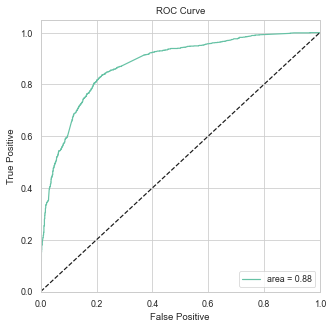

In [193]:

fpr, tpr, thresholds = metrics.roc_curve( y_pred_final['Converted_Orig'], y_pred_final['Converted_Prob'],drop_intermediate = False )
roc_auc_score = metrics.roc_auc_score( y_pred_final['Converted_Orig'], y_pred_final['Converted_Prob'] )
plt.figure(figsize=(5, 5))
plt.plot( fpr, tpr, label='area = %0.2f' % roc_auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [194]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,RecordID,Converted_Orig,Converted_Prob,final_prediction,lead_score
546,3478,1,0.999382,1,99
745,6383,1,0.999348,1,99
1091,818,1,0.999220,1,99
2405,5921,1,0.998874,1,99
835,4613,1,0.998185,1,99
...,...,...,...,...,...
1530,7974,0,0.016081,0,1
1622,4800,0,0.016081,0,1
17,3545,0,0.008220,0,0
1396,7046,0,0.007988,0,0


In [195]:
y_pred_final.head(5)

,RecordID,Converted_Orig,Converted_Prob,final_prediction,lead_score
0,4269,1,0.741325,1,74
1,2376,1,0.926116,1,92
2,7766,1,0.662400,1,66
3,9199,0,0.068796,0,6
4,4359,1,0.773834,1,77


In [196]:
pd.options.display.float_format = '{:.2f}'.format
final_parameters = model_6.params[1:]
final_parameters

Do Not Email                            -1.51
Total Time Spent on Website              1.08
Lead Origin_Landing Page Submission     -0.25
Lead Origin_Lead Add Form                3.48
Lead Source_Olark Chat                   1.02
Lead Source_Welingak Website             1.97
Last Activity_Olark Chat Conversation   -1.37
Last Activity_SMS Sent                   1.30
Last Activity_Unsubscribed               0.99
Occupation_Working Professional          2.81
dtype: float64

In [197]:
top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                            -43.32
Total Time Spent on Website              31.15
Lead Origin_Landing Page Submission      -7.09
Lead Origin_Lead Add Form               100.00
Lead Source_Olark Chat                   29.27
Lead Source_Welingak Website             56.53
Last Activity_Olark Chat Conversation   -39.41
Last Activity_SMS Sent                   37.29
Last Activity_Unsubscribed               28.34
Occupation_Working Professional          80.67
dtype: float64

<Figure size 864x576 with 0 Axes>

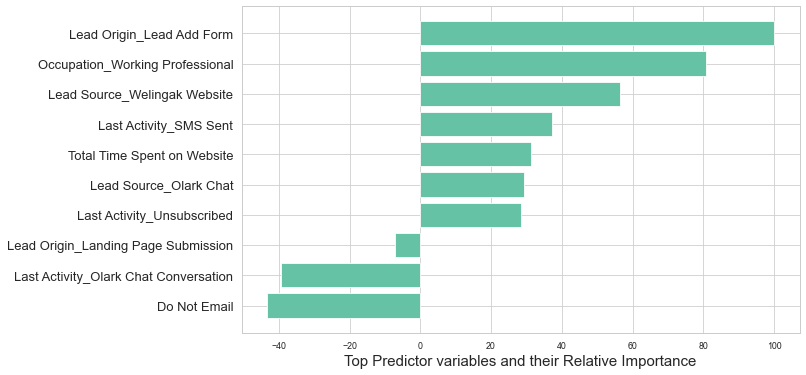

In [199]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[selected_columns].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictor variables and their Relative Importance', fontsize=15)
plt.show()

#### Top Predictors which impact leads conversion is :
    
- Lead Origin_Lead Add Form
- What is your current occupation having "Working Professional"
- Lead Source as "Welingak Website"

## Inference

- Accuracy : 0.807204700061843

# Conclusion

- Data is pre processed 
    - missing values imputed
    - null claues dropped
    - Did RFE Analysis
    - Trained the model using processed data
    - Tested Data using test Data


# Recommendation to the X Education

- With a conversion rate of almost 90%, leads from the "Lead Add Form" rank third in terms of conversions.
- working professionals have a better conversion rate (about 90%), thus they should receive more attention while interacting.
- Welingaks website converts leads at a rate of about 98%. As it has a better likelihood of conversion, more adverts should be placed on this website to appeal to the leads from there.
- Over 90% of leads that originated from a "reference" converted. To boost the number of leads, we should entice and reward current members to recommend new people.